In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_column",None)

In [15]:
data = pd.read_csv("Online_Sales_Dataset.csv")
dff = pd.DataFrame(data)
df = dff.copy()
df_columns = df.columns
print(df_columns)

df.info()

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'ship-city-new-address'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128915 entries, 0 to 128914
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Order ID               128915 non-null  object 
 1   Date                   128915 non-null  object 
 2   Status                 128915 non-null  object 
 3   Fulfilment             128915 non-null  object 
 4   Sales Channel          128915 non-null  object 
 5   ship-service-level     128915 non-null  object 
 6   Style                  128915 non-null  object 
 7   SKU                    128915 non-null  object 
 8   C

In [16]:
data1 = pd.read_csv("High_Value_Customer.csv")
dff1 = pd.DataFrame(data1)
df1 = dff1.copy()
df1_columns = df1.columns
print(df1_columns)

df1.info()

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'ship-city-new-address'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order ID               54 non-null     object 
 1   Date                   54 non-null     object 
 2   Status                 54 non-null     object 
 3   Fulfilment             54 non-null     object 
 4   Sales Channel          54 non-null     object 
 5   ship-service-level     54 non-null     object 
 6   Style                  54 non-null     object 
 7   SKU                    54 non-null     object 
 8   Category           

In [17]:
df.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,ship-city-new-address
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,Unknown,0,INR,647.62,MUMBAI,Maharashtra,400081.0,IN,Unknown,False,Easy Ship,MUMBAI
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,INR,406.00,BENGALURU,Karnataka,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,BENGALURU


In [18]:
df["Date"] = pd.to_datetime(df["Date"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128915 entries, 0 to 128914
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Order ID               128915 non-null  object        
 1   Date                   128915 non-null  datetime64[ns]
 2   Status                 128915 non-null  object        
 3   Fulfilment             128915 non-null  object        
 4   Sales Channel          128915 non-null  object        
 5   ship-service-level     128915 non-null  object        
 6   Style                  128915 non-null  object        
 7   SKU                    128915 non-null  object        
 8   Category               128915 non-null  object        
 9   Size                   128915 non-null  object        
 10  Courier Status         128915 non-null  object        
 11  Qty                    128915 non-null  int64         
 12  currency               128915 non-null  obje

In [20]:
df["order_year"] = df["Date"].dt.year
df["order_month"] = df["Date"].dt.month
df["quarter"] = df["Date"].dt.quarter
df["order_day"] = df["Date"].dt.day
df["order_week"] = df["Date"].dt.isocalendar().week
def get_week(day):
    if 1<= day <= 7:
        return "Week 1"
    elif 8<= day <= 14:
        return "Week 2 "
    elif 15<= day <= 21:
        return "Week 3"
    elif 22<= day <= 28:
        return "Week 4"
    else:
        return "Week 5"

df["week_of_month"] = df["order_day"].apply(get_week)

# OR 
df["week_of_month"] = "Week" + ((df["order_day"] - 1)// 7 + 1).astype(str)


df["weekend"] = df["Date"].dt.dayofweek>=5
df["day_of_week"] = df["Date"].dt.day_name()

In [21]:
df.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,ship-city-new-address,order_year,order_month,quarter,order_day,order_week,week_of_month,weekend,day_of_week
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,Unknown,0,INR,647.62,MUMBAI,Maharashtra,400081.0,IN,Unknown,False,Easy Ship,MUMBAI,2022,4,2,30,17,Week5,True,Saturday
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,INR,406.00,BENGALURU,Karnataka,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,BENGALURU,2022,4,2,30,17,Week5,True,Saturday


In [22]:
# Month having highest no. of total order
df.groupby("order_month").agg(
            orders_count = ("Order ID", "count"),
            total_sale_M = ("Amount", lambda x: x.sum() / 1_000_000)
).sort_values(by = "orders_count",ascending = False).head(1)

,orders_count,total_sale_M
order_month,,
4,49045,30.65817


In [42]:
# Month having lowest no. of total order
df.groupby("order_month").agg(
            orders_count = ("Order ID", "count"),
            total_sale_M = ("Amount", "sum")
).sort_values(by = "orders_count",ascending = True).head(1)

,orders_count,total_sale_M
order_month,,
3,171,107016.11


In [24]:
# Which quarter have maximum total sale 
df.groupby("quarter").agg(
            Total_sale = ("Amount", "sum")
).sort_values(by = "Total_sale",ascending = False).head(1)

,Total_sale
quarter,
2,8.339927e+07


In [43]:
# Which day_of_week have highest avg amount 
df.groupby("day_of_week").agg(
            Avg_amount = ("Amount", "mean")
).sort_values(by = "Avg_amount",ascending = False).head(2)

,Avg_amount
day_of_week,
Friday,650.620223
Sunday,649.990846


### Top-1 Summary (Highest Values)

- **Highest Order Month:**  
  - Month **4** with **49,045 orders**

- **Second Output (Orders Count):**  
  - Month **3** with **171 orders**

- **Highest Quarter Sale:**  
  - **Q2** with **₹83,399,270** (8.33e+07)

- **Highest Average Amount by Day:**  
  - **Friday** with an average sale of **650.62**


In [26]:
df.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,ship-city-new-address,order_year,order_month,quarter,order_day,order_week,week_of_month,weekend,day_of_week
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,Unknown,0,INR,647.62,MUMBAI,Maharashtra,400081.0,IN,Unknown,False,Easy Ship,MUMBAI,2022,4,2,30,17,Week5,True,Saturday
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,INR,406.00,BENGALURU,Karnataka,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,BENGALURU,2022,4,2,30,17,Week5,True,Saturday


In [27]:
# how many customers have order count > 1
cust_counts = df["Order ID"].value_counts()
rp_cust = cust_counts[cust_counts > 1]
rp_cust.shape

(6828,)

# RFM Analysis

In [28]:
df.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,ship-city-new-address,order_year,order_month,quarter,order_day,order_week,week_of_month,weekend,day_of_week
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,Unknown,0,INR,647.62,MUMBAI,Maharashtra,400081.0,IN,Unknown,False,Easy Ship,MUMBAI,2022,4,2,30,17,Week5,True,Saturday
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,INR,406.00,BENGALURU,Karnataka,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,BENGALURU,2022,4,2,30,17,Week5,True,Saturday


In [29]:
df["Recency"] = (df["Date"].max() - df["Date"]).dt.days

In [30]:
Recency = df[["Order ID","Recency"]].drop_duplicates(subset="Order ID")

In [31]:
Frequency = pd.DataFrame(df.groupby("Order ID").agg(
                frequency = ("Order ID","count")))

In [32]:
Monetary = pd.DataFrame(df.groupby("Order ID").agg(
                monetary = ("Amount","sum")))

In [33]:
RFM_Table = Recency.merge(Frequency, on = "Order ID").merge(Monetary, on = "Order ID")

In [34]:
RFM_Table = pd.DataFrame(RFM_Table)

In [35]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,ship-city-new-address,order_year,order_month,quarter,order_day,order_week,week_of_month,weekend,day_of_week,Recency
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,Unknown,0,INR,647.62,MUMBAI,Maharashtra,400081.0,IN,Unknown,False,Easy Ship,MUMBAI,2022,4,2,30,17,Week5,True,Saturday,60
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,INR,406.00,BENGALURU,Karnataka,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,BENGALURU,2022,4,2,30,17,Week5,True,Saturday,60
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,Shipped,1,INR,329.00,NAVI MUMBAI,Maharashtra,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Unknown,NAVI MUMBAI,2022,4,2,30,17,Week5,True,Saturday,60
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,Unknown,0,INR,753.33,PUDUCHERRY,Puducherry,605008.0,IN,Unknown,False,Easy Ship,PUDUCHERRY,2022,4,2,30,17,Week5,True,Saturday,60
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,Shipped,1,INR,574.00,CHENNAI,Tamil Nadu,600073.0,IN,Unknown,False,Unknown,CHENNAI,2022,4,2,30,17,Week5,True,Saturday,60


In [36]:
RFM_Table.head()

,Order ID,Recency,frequency,monetary
0,405-8078784-5731545,60,1,647.62
1,171-9198151-1101146,60,1,406.00
2,404-0687676-7273146,60,1,329.00
3,403-9615377-8133951,60,1,753.33
4,407-1069790-7240320,60,1,574.00


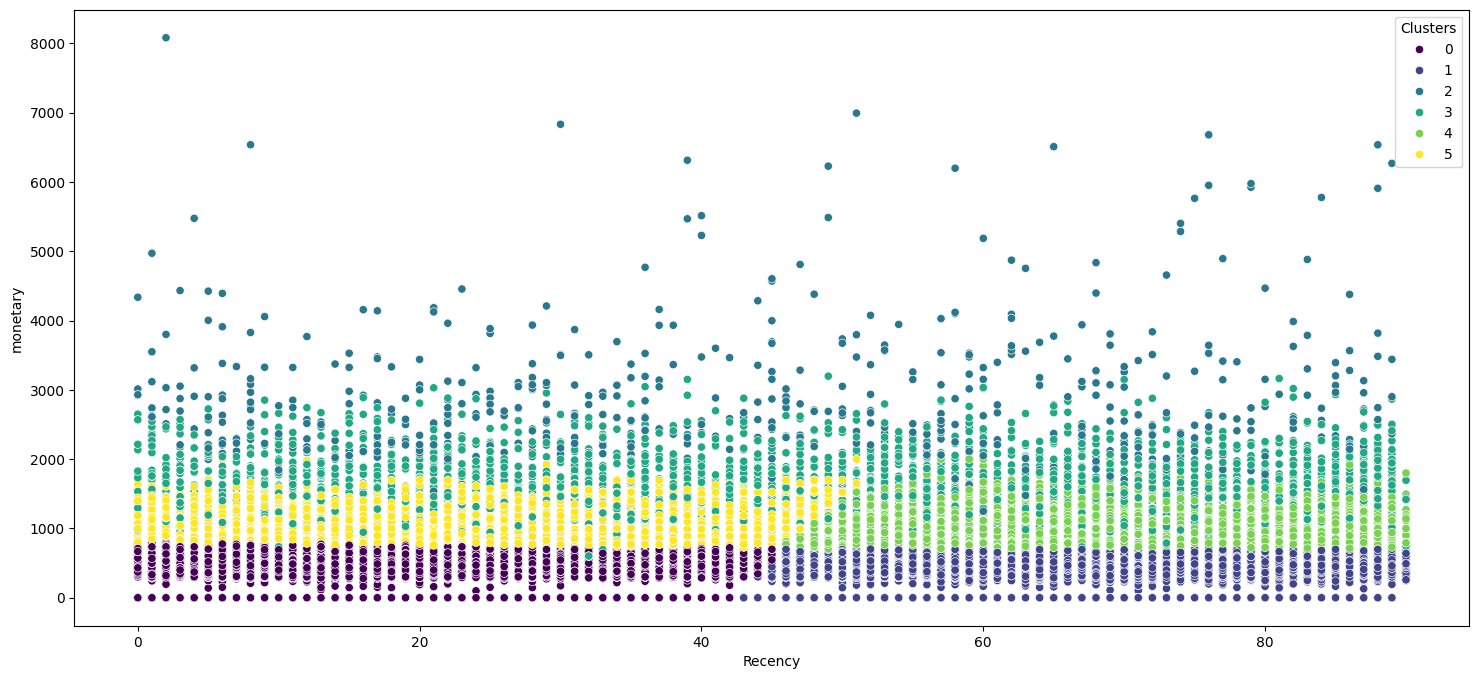

In [37]:
# Standardizing columns for clustering:
Std_col = RFM_Table[["Recency","frequency","monetary"]]

from sklearn.preprocessing import StandardScaler
Stded_col = StandardScaler().fit_transform(Std_col)

from sklearn.cluster import KMeans
RFM_Table["Clusters"] = KMeans(n_clusters = 6, random_state = 10).fit_predict(Stded_col)

plt.figure(figsize = (18,8))
sns.scatterplot(data = RFM_Table, x = "Recency", y = "monetary", hue = "Clusters", palette = "viridis")
plt.show()

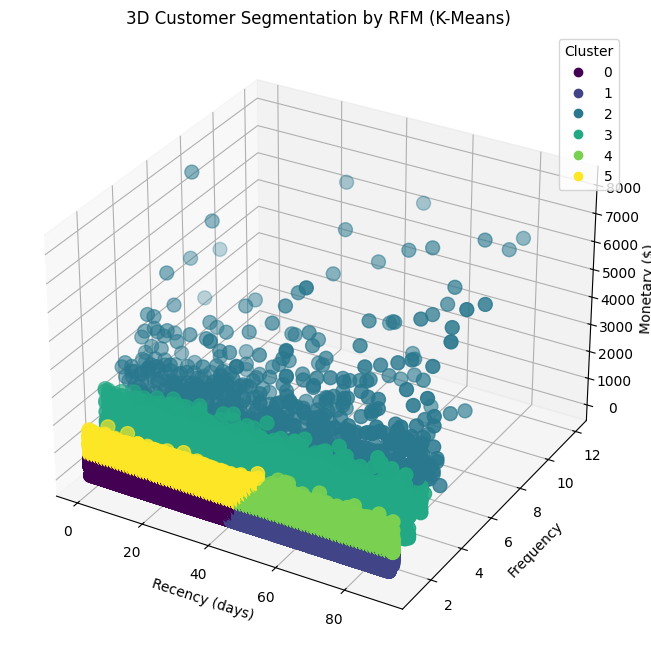

In [38]:
# Asking gpt for 3d graph:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')


sc = ax.scatter(
    RFM_Table["Recency"],
    RFM_Table["frequency"],
    RFM_Table["monetary"],
    c=RFM_Table["Clusters"],
    cmap='viridis',
    s=100
)


ax.set_xlabel("Recency (days)")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary ($)")
ax.set_title("3D Customer Segmentation by RFM (K-Means)")

plt.legend(*sc.legend_elements(), title="Cluster")
plt.show()

In [ ]:
plt.figure(figsize = (18,14))
sns.pairplot(RFM_Table,vars=["Recency","frequency","monetary"],  hue="Clusters",palette="viridis", diag_kind="kde",height=2.5) 

plt.show()

In [39]:
RFM_Table.head(3)

,Order ID,Recency,frequency,monetary,Clusters
0,405-8078784-5731545,60,1,647.62,1
1,171-9198151-1101146,60,1,406.00,1
2,404-0687676-7273146,60,1,329.00,1


In [44]:
RFM_stats = pd.DataFrame(RFM_Table.groupby("Clusters").agg(
                    Customer_counts = ("Order ID","count"),
                    Avg_Recency = ("Recency","mean"),
                    Avg_Frequency = ("frequency","mean"),
                    Avg_Monetary = ("monetary","mean"),
                    Total_Monetary = ("monetary","sum")))

RFM_stats

,Customer_counts,Avg_Recency,Avg_Frequency,Avg_Monetary,Total_Monetary
Clusters,,,,,
0,34518,21.662234,1.000000,521.762128,1.801019e+07
1,41239,68.157909,1.000000,478.674579,1.974006e+07
2,635,45.407874,3.877165,2767.871191,1.757598e+06
3,6193,47.529307,2.089779,1288.042265,7.976846e+06
4,20428,68.268896,1.000000,925.980003,1.891592e+07
5,17326,25.561237,1.000000,987.283722,1.710568e+07


In [47]:
RFM_Table.head(2)

,Order ID,Recency,frequency,monetary,Clusters,label
0,405-8078784-5731545,60,1,647.62,1,Low Value Customers
1,171-9198151-1101146,60,1,406.00,1,Low Value Customers


In [46]:
RFM_Table["Clusters"] = RFM_Table["Clusters"].astype(str)

mapping =({"0" :"New Budget Customers","1" : "Low Value Customers",
            "2" : "VIP Loyal Customers ","3":"Loyal Mid Value Customers",
            "4" : "High Spend Inactive Customers","5":"High-Spend Recent Buyers"})
RFM_Table["label"] = RFM_Table["Clusters"].map(mapping)

## 🔹 Key Insights & Suggestions

1. **VIPs (Cluster 2)**: Small but extremely profitable — focus on retention and exclusive offers.  
2. **Loyal Mid-Value (Cluster 3)**: Good repeat buyers — upsell and loyalty programs can boost revenue.  
3. **Recent Buyers (Clusters 0 & 5)**: Large, fresh customer base — engage with targeted campaigns to increase frequency.  
4. **Inactive Customers (Clusters 1 & 4)**: Long recency, low engagement — run reactivation campaigns; high-value inactive customers (Cluster 4) may return with incentives.


# Let's analyse customer churn 

In [ ]:
df.shape

In [ ]:

non_cancel_data = df[df["Status"] != 'Cancelled']
non_cancel_data.shape

In [ ]:
churn_data = RFM_Table[["Order ID","Recency","monetary","frequency"]]
churn_data.shape

In [ ]:
churn_data.head(2)

In [ ]:
mx_data = df.groupby("Order ID").agg(
    last_order_date = ("Date","max"))

In [ ]:
churn_data = churn_data.merge(mx_data,on = "Order ID")
churn_data.head()

In [ ]:
churn_data.tail(10)

In [ ]:
churn_data["last purchase (days) ago"] = (df["Date"].max() - churn_data["last_order_date"]).dt.days

In [ ]:
churn_data.describe()

In [ ]:
# Labeling the customers based on recency

def churn_label(value):
    if 0<= value <= 25:
        return "Active"
    elif 26<= value <= 50:
        return "Warning"
    elif 51<= value <= 70:
        return "At Risk"
    else:
        return "Highly Churned"
    
churn_data["Churn_Labels"] = churn_data["last purchase (days) ago"].apply(churn_label)

In [ ]:
# lets find out avg amount of order by order id

avg_order_value = df.groupby("Order ID").agg(
                    avg_order_value_ = ("Amount","mean"))
churn_data = churn_data.merge(avg_order_value, on = "Order ID")
churn_data.head(10)

In [ ]:
sns.violinplot(data = churn_data["avg_order_value_"],cut=0)

## Violin Plot Insights on Average Order Value

- Most customers have an **average order value between ₹250–₹1000**.  
- A significant number of customers fall in the **₹1000–₹1500 range**, indicating demand for higher-value products.  
- There are **outliers with avg orders around ₹2000**, showing some premium purchases in the dataset.


In [ ]:
col_to_add = ["Order ID","ship-state","ship-city","order_month","Category"]
churn_data = churn_data.merge(df[col_to_add].drop_duplicates("Order ID"),on = "Order ID",how = "left")

In [ ]:
churn_data.head(100)

In [ ]:
data = (churn_data.groupby(["ship-state","Churn_Labels"]).agg(
                            customer_count = ("Order ID","count")).sort_values(by = "customer_count",
                                                                               ascending = False).head(50).reset_index())
plt.figure(figsize=(14,6))
sns.barplot(data = data, x = "customer_count", y = "ship-state", hue = "Churn_Labels")

### Top 5 Insights from Churn Distribution by State

1. **Maharashtra dominates overall customer count** across all churn labels, especially *Active* and *Warning*, showing the largest customer base among all states.

2. **Karnataka is the second-highest contributor**, with strong representation in *Active* customers, indicating a healthy retention segment.

3. **Telangana and Tamil Nadu show similar churn patterns**, both having balanced distributions across *At Risk*, *Active*, *Highly Churned*, and *Warning* categories.

4. **Northern states like Delhi and Uttar Pradesh** have moderate customer volumes but show relatively higher *Highly Churned* and *Warning* customers compared to their total size.

5. **States at the bottom such as Rajasthan and Madhya Pradesh** have significantly lower customer counts, but their *Warning* and *At Risk* proportions indicate potential churn issues despite smaller volumes.


In [ ]:
churn_data["is_churned?"] = churn_data["Churn_Labels"].apply(lambda x : 1 if x == 'Highly Churned' else 0)

churn_data_by_category = churn_data.groupby("Category").agg(
            total_customers = ("Order ID", "count"),
            churned_customer_count = ("is_churned?","sum"))

churn_data_by_category["churn_cust(%)"] = (churn_data_by_category["churned_customer_count"]/churn_data_by_category["total_customers"] * 100).round(2)
churn_data_by_category.sort_values(by = "churn_cust(%)", ascending = False)

## Category Churn Insights (Short – 5 Points)

1. **Blouse has the highest churn rate (29.33%)**, indicating major product/quality issues.  
2. **Set contributes the most churned customers (12,077)** due to very high sales volume.  
3. **Kurta also shows high churn (25.12%)**, making it another priority category to fix.  
4. **Western Dress & Saree have the lowest churn rates (16–17%)**, showing stronger customer satisfaction.  
5. **Overall churn is highest in traditional wear**, while western categories retain customers better.


In [ ]:
churn_data.groupby("Churn_Labels").agg(
                customer_count = ("Order ID","count"),
                avg_monetary = ("monetary","mean"),
                total_monetary = ("monetary","sum"))

## Churn Segment Summary (2–3 Short Insights)

1. **Active customers spend the most overall**, generating the highest total revenue (~22.17M).  
2. **Highly Churned customers show the lowest average spending**
3. **Warning customers actually have the *highest* average monetary value**, meaning they are valuable but at risk of leaving.

In [ ]:
churn_data.head(2)

In [ ]:
churn_data.to_csv("churn_data.csv", index = False)

# Some Basics Analysis

In [ ]:
pivot = df.pivot_table(index = "order_month", columns = "order_day", values = "Amount", aggfunc = "sum",fill_value = 0)
plt.figure(figsize = (18,14))
sns.heatmap(pivot,cmap = "coolwarm", annot = True, fmt = ".0f")

# Asking the AI tool for a better visualization, with the values formatted in millions instead of raw numbers

In [ ]:
pivot_millions = pivot / 1_000_000

# Create heatmap
plt.figure(figsize=(14,8))
sns.heatmap(pivot_millions, annot=True, fmt=".1f", cmap="coolwarm", 
            linewidths=0.5, cbar_kws={"label": "Sales (Millions)"})
plt.title("Daily Sales Performance by Month (in Millions)", fontsize=16, pad=20)
plt.xlabel("Day of Month", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.tight_layout()
plt.show()

### This graph helps us visualize the sales for each day of the month.

- The 1st week of the 5th month shows the highest sales overall.
- Daily sales stay close to **1M** for most days in that period.
- After the **15th of June**, sales drop sharply.
- The decline continues until it reaches a very low sales level compared to the earlier weeks.


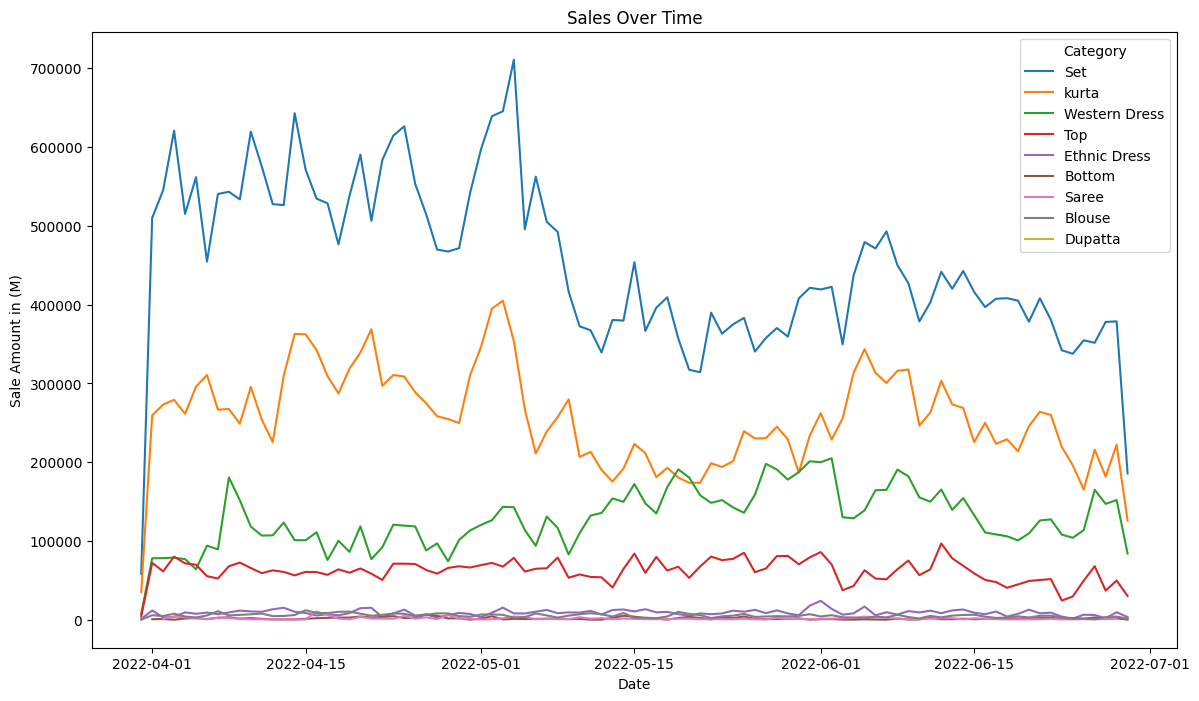

In [48]:
plt.figure(figsize = (14, 8))
sns.lineplot(data = df, x = "Date", y = "Amount", estimator="sum", errorbar =None, hue = "Category")
plt.xlabel("Date")
plt.ylabel("Sale Amount in (M)")
plt.title("Sales Over Time")
plt.show()


# Offering discounts on Sets and Kurtas during April and May can attract more customers

- We observed a sales peak in the first week of the 5th month due to high customer demand for Sets and Kurtas.
- That week recorded the highest sales because more Sets and Kurtas were sold compared to other periods.
- The increased Kurta sales were likely driven by the summer season, as customers prefer light and comfortable clothing during hot weather.


In [ ]:
df.head(2)

In [ ]:
c_y_m_status = df.groupby(["Category","order_year","order_month"]).agg(
                        Total_Orders = ("Order ID", "count"),
                        Total_Sales =  ("Amount","sum"))
c_y_m_status["Total_Sales"] = (c_y_m_status["Total_Sales"]/100000).round(2)
c_y_m_status.rename(columns = {"Total_Sales" : "Total_Sales(Lakhs)"},inplace = True)
c_y_m_status = c_y_m_status.reset_index()
c = c_y_m_status.copy()

In [ ]:
c.to_csv("cym_data.csv", index = False)

In [ ]:
c["orders_prct_change"] = c.groupby("Category")["Total_Orders"].pct_change()
def glitch(x):
    if pd.isna(x):
        return "-"
    elif x == float("inf") or x == float("-inf"):
        return "-"
    else:
        return f"{x*100:.1f}%"
c["orders_prct_change"] = c["orders_prct_change"].apply(glitch)
c

In [ ]:
c["Amount_prct_change"] = c.groupby("Category")["Total_Sales(Lakhs)"].pct_change()
def glitch(x):
    if pd.isna(x):
        return "-"
    elif x == float("inf") or x == float("-inf"):
        return "-"
    else:
        return f"{x*100:.1f}%"
c["Amount_prct_change"] = c["Amount_prct_change"].apply(glitch)
c

In [ ]:
c.to_csv("cym_data.csv", index = False)

In [ ]:
plt.figure(figsize=(10,5))

sns.lineplot(data=c, x="order_month", y="Amount_prct_change", hue="Category", marker="o")
sns.lineplot(data=c, x="order_month", y="orders_prct_change", hue="Category", linestyle="--", marker="o")

plt.title("Month-over-Month % Change")
plt.xlabel("Month")
plt.ylabel("% Change")
plt.show()


In [ ]:
df.head(2)

In [ ]:
df.to_csv("Amazon_sales_data_EDA.csv", index = False)

In [ ]:
RFM_Table.to_csv("RFM_Table.csv", index = False)

In [ ]:
RFM_stats.to_csv("RFM_stats.csv", index = True)